In [330]:
import os
import pandas as pd
import numpy as np
from numpy import array
import datetime
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
import seaborn as sns
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [331]:
csv_homepath = "./home_values.csv"
csv_interestpath = "./interest_rates.csv"

In [332]:
home_df = pd.read_csv(csv_homepath)

In [333]:
interest_df = pd.read_csv(csv_interestpath)

In [334]:
home_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,InterestAverage_2005,InterestAverage_2010,InterestAverage_2015,InterestAverage_2020,Average_2005,Average_2010,Average_2015,Average_2020
0,102001,0,UnitedStates,Country,NaN,5.866731,4.689808,3.850577,3.432857,195475,174184,194076,248850
1,394913,1,NewYorkCity,Msa,NY,5.866731,4.689808,3.850577,3.432857,444629,403317,414806,486502
2,753899,2,LosAngeles,Msa,CA,5.866731,4.689808,3.850577,3.432857,560105,432976,547017,694156
3,394463,3,"Chicago,IL",Msa,IL,5.866731,4.689808,3.850577,3.432857,256753,210135,206541,243143
4,394514,4,"Dallas-FortWorth,TX",Msa,TX,5.866731,4.689808,3.850577,3.432857,152478,150397,183593,256061


In [335]:
df_2005= home_df[['RegionName', 'StateName','InterestAverage_2005','Average_2005']]
df_2010= home_df[['RegionName', 'StateName','InterestAverage_2010','Average_2010']]
df_2015= home_df[['RegionName', 'StateName','InterestAverage_2015','Average_2015']]
df_2020= home_df[['RegionName', 'StateName','InterestAverage_2020','Average_2020']]


In [336]:
df_2005.head()

,RegionName,StateName,InterestAverage_2005,Average_2005
0,UnitedStates,NaN,5.866731,195475
1,NewYorkCity,NY,5.866731,444629
2,LosAngeles,CA,5.866731,560105
3,"Chicago,IL",IL,5.866731,256753
4,"Dallas-FortWorth,TX",TX,5.866731,152478


In [337]:
df_2005['year'] = [2005 for i in range(0,len(df_2005))]
df_2010['year'] = [2010 for i in range(0,len(df_2010))]
df_2015['year'] = [2015 for i in range(0,len(df_2015))]
df_2020['year'] = [2020 for i in range(0,len(df_2020))]

C:\Users\Clare\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Clare\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Clare\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [338]:
df_2005.head()

,RegionName,StateName,InterestAverage_2005,Average_2005,year
0,UnitedStates,NaN,5.866731,195475,2005
1,NewYorkCity,NY,5.866731,444629,2005
2,LosAngeles,CA,5.866731,560105,2005
3,"Chicago,IL",IL,5.866731,256753,2005
4,"Dallas-FortWorth,TX",TX,5.866731,152478,2005


In [339]:
df_2005 = df_2005.rename(columns = {'InterestAverage_2005': 'interest_rates','Average_2005':'home_values'})
df_2010 = df_2010.rename(columns = {'InterestAverage_2010': 'interest_rates','Average_2010':'home_values'})
df_2015 = df_2015.rename(columns = {'InterestAverage_2015': 'interest_rates','Average_2015':'home_values'})
df_2020 = df_2020.rename(columns = {'InterestAverage_2020': 'interest_rates','Average_2020':'home_values'})

In [340]:
df_homeinterest = pd.concat([df_2005,df_2010,df_2015,df_2020])

In [341]:
df_homeinterest.head()

,RegionName,StateName,interest_rates,home_values,year
0,UnitedStates,NaN,5.866731,195475,2005
1,NewYorkCity,NY,5.866731,444629,2005
2,LosAngeles,CA,5.866731,560105,2005
3,"Chicago,IL",IL,5.866731,256753,2005
4,"Dallas-FortWorth,TX",TX,5.866731,152478,2005


In [342]:
df_FL = df_homeinterest.RegionName.str.contains("Miami")
df_NY = df_homeinterest.RegionName.str.contains("NewYorkCity")
df_LA = df_homeinterest.RegionName.str.contains("LosAngeles")
df_HI = df_homeinterest.RegionName.str.contains("Honolulu")
df_SF = df_homeinterest.RegionName.str.contains("SanFrancisco")
df_OR = df_homeinterest.RegionName.str.contains("Orlando")
df_LV = df_homeinterest.RegionName.str.contains("Las Vegas")
df_TX = df_homeinterest.RegionName.str.contains("Houston")
df_DC = df_homeinterest.RegionName.str.contains("DistrictColumbia")
df_BO = df_homeinterest.RegionName.str.contains("Boston")
dffl= df_homeinterest[df_FL]
dfny= df_homeinterest[df_NY]
dfla= df_homeinterest[df_LA]
dfhi= df_homeinterest[df_HI]
dfsf= df_homeinterest[df_SF]
dfor= df_homeinterest[df_OR]
dflv= df_homeinterest[df_LV]
dftx= df_homeinterest[df_TX]
dfdc= df_homeinterest[df_DC]
dfbo= df_homeinterest[df_BO]

In [343]:
dftt = df_homeinterest[(df_homeinterest.RegionName == 'Miami') | (df_homeinterest.RegionName == 'NewYorkCity') | (df_homeinterest.RegionName == 'LosAngeles')  | (df_homeinterest.RegionName == 'Honolulu')| (df_homeinterest.RegionName == 'SanFrancisco') | (df_homeinterest.RegionName == 'Orlando') | (df_homeinterest.RegionName == 'LasVegas')| (df_homeinterest.RegionName == 'Houston') | (df_homeinterest.RegionName == 'DistrictColumbia')| (df_homeinterest.RegionName == 'Boston')]

In [344]:
dftt.head()

,RegionName,StateName,interest_rates,home_values,year
1,NewYorkCity,NY,5.866731,444629,2005
2,LosAngeles,CA,5.866731,560105,2005
6,Houston,TX,5.866731,147495,2005
7,DistrictColumbia,DC,5.866731,417251,2005
8,Miami,FL,5.866731,271555,2005


In [345]:
dftt.to_csv("th.csv")

In [346]:
x = dftt['interest_rates'].values.reshape(-1, 1)
y = dftt["home_values"].values.reshape(-1, 1)

df_x = x
df_y = y
print(df_x.shape, df_y.shape)

(40, 1) (40, 1)


In [347]:
dataset = pd.read_csv('officialhomevalues.csv')
X = dataset.iloc[:, 3].values.reshape(-1, 1)
y = dataset.iloc[:, 4].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
# X = dataset.iloc[:, 3].values
# y = dataset.iloc[:, 4].values

Shape:  (40, 1) (40, 1)


In [348]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [349]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [350]:
y_pred = regressor.predict(X_test)

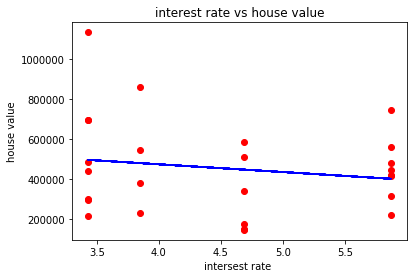

In [351]:
# Linear Regression based upon actual data points
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('interest rate vs house value')
plt.xlabel('intersest rate ')
plt.ylabel('house value')
plt.show()

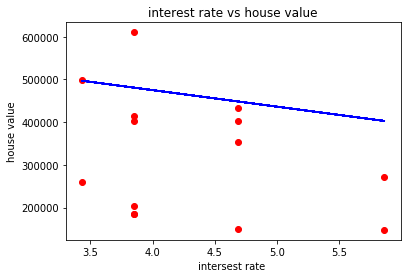

In [352]:
# Predicting the Test Set Results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('interest rate vs house value')
plt.xlabel('intersest rate ')
plt.ylabel('house value')
plt.show()

In [353]:
from sklearn.metrics import mean_squared_error, r2_score

In [354]:
# Use our model to make predictions
predicted = regressor.predict(X_test)


In [355]:
# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 37084331763.21327
R-squared (R2 ): -0.9358282530860902
